In [5]:
import numpy as np
import pandas as pd
import gzip
import glob
import os
import sys

from sklearn import preprocessing
import matplotlib.pyplot as plt

sys.path.append('../../..')

def scale_data(array, means,stds):
    return (array-means)/stds

import matplotlib.pyplot as plt
%matplotlib inline


# Sequencing count analysis

In [6]:
# load in sgRNA library IDs
df_IDs = pd.read_csv('../../data/screen_libraries/20211027_galvo_ecm_diff_simple.csv')
df_IDs = df_IDs[df_IDs.screen == 'galvanotaxis']

df_IDs.columns = ['gene', 'sgRNA', 'screen']
df_IDs = df_IDs[['gene', 'sgRNA']]


In [7]:
# find prcessed counts
files = glob.glob('/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230*_galvo_sublib/01.RawData/NB*/*counts*.csv')
files

['/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/01.RawData/NB14/NB14_CKDL230009157-1A_H3TNFDSX7_L3_1_seqtk_sgRNAcounts_20230523.csv',
 '/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/01.RawData/NB14/NB14_CKDL230009157-1A_H5HJGDSX7_L1_1_seqtk_sgRNAcounts_20230523.csv',
 '/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/01.RawData/NB09/NB09_CKDL230009152-1A_H5HJGDSX7_L4_1_seqtk_sgRNAcounts_20230523.csv',
 '/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/01.RawData/NB09/NB09_CKDL230009152-1A_H3TNFDSX7_L3_1_seqtk_sgRNAcounts_20230523.csv',
 '/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/01.RawData/NB12/NB12_CKDL230009155-1A_H5HJGDSX7_L4_1_seqtk_sgRNAcounts_20230523.csv',
 '/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_galvo_sublib/01.RawData/NB12/NB12_CKDL230009155-1A_H3TNFDSX7_L3_1_seqtk_sgRNAcounts_20230523.csv',
 '/Volumes/ExpansionHomesA/nbelliveau/sequencing/20230427_

In [10]:
gene_dict = dict(zip(df_IDs.sgRNA.values, df_IDs.gene.values))


In [14]:
# load in sgRNA counts
#################################
df = df_IDs.copy()
df_all = pd.DataFrame()

for f in files:
    exp_num = f.split('/01.RawData/')[1].split('/')[0]
    fname = f.split('/01.RawData/')[1].split('/')[1]
    
    df_temp = pd.read_csv(f)[['sgRNA', 'index']]
    df_temp.columns = ['sgRNA', 'counts']
    df_temp['experiment'] = exp_num
    df_temp['fname'] = fname

    df_temp_matched = df_temp[df_temp.sgRNA.isin(df_IDs.sgRNA.values)]
    df_temp_matched['gene'] = df_temp_matched['sgRNA'].map(gene_dict)
    
    df_temp_notmatched = df_IDs[~df_IDs.sgRNA.isin(df_temp_matched.sgRNA.values)]
    df_temp_notmatched['counts'] = 0

#     df_temp_matched = df_temp_matched.append(df_temp_notmatched)
    df_temp_matched = pd.concat([df_temp_matched, df_temp_notmatched], ignore_index=True)

#     df = pd.merge(df, df_temp_matched, on = 'sgRNA')
#     df_all = df_all.append(df_temp_matched)
    df_all = pd.concat([df_all, df_temp_matched], ignore_index=True)


/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_matched['gene'] = df_temp_matched['sgRNA'].map(gene_dict)
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_notmatched['counts'] = 0
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_matched['gene'] = df_temp_matched['sgRNA'].map(gene_dict)
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_notmatched['counts'] = 0
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_matched['gene'] = df_temp_matched['sgRNA'].map(gene_dict)
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_notmatched['counts'] = 0
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_matched['gene'] = df_temp_matched['sgRNA'].map(gene_dict)
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_notmatched['counts'] = 0
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_matched['gene'] = df_temp_matched['sgRNA'].map(gene_dict)
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_notmatched['counts'] = 0
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_matched['gene'] = df_temp_matched['sgRNA'].map(gene_dict)
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_notmatched['counts'] = 0
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_matched['gene'] = df_temp_matched['sgRNA'].map(gene_dict)
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_notmatched['counts'] = 0
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_matched['gene'] = df_temp_matched['sgRNA'].map(gene_dict)
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_notmatched['counts'] = 0
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_matched['gene'] = df_temp_matched['sgRNA'].map(gene_dict)
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_notmatched['counts'] = 0
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_matched['gene'] = df_temp_matched['sgRNA'].map(gene_dict)
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_notmatched['counts'] = 0
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/1066817292.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [15]:
print('done')

done


In [17]:
df_all.head()

,sgRNA,counts,experiment,fname,gene
0,AAAAAACAGGATCAACCTCA,2901,NB14,NB14_CKDL230009157-1A_H3TNFDSX7_L3_1_seqtk_sgR...,CPA2
1,AAAAACTTACCAACCAGAAA,3427,NB14,NB14_CKDL230009157-1A_H3TNFDSX7_L3_1_seqtk_sgR...,WFDC11
2,AAAAAGCCAGGGCCGCACGC,2363,NB14,NB14_CKDL230009157-1A_H3TNFDSX7_L3_1_seqtk_sgR...,CELSR3
3,AAAACATCGACCGAAAGCGT,3877,NB14,NB14_CKDL230009157-1A_H3TNFDSX7_L3_1_seqtk_sgR...,CONTROL
4,AAAACATGATTCAATGGAGT,2471,NB14,NB14_CKDL230009157-1A_H3TNFDSX7_L3_1_seqtk_sgR...,OR4D11


In [18]:
df_all[df_all.experiment == 'NB14'].fname.unique()

array(['NB14_CKDL230009157-1A_H3TNFDSX7_L3_1_seqtk_sgRNAcounts_20230523.csv',
       'NB14_CKDL230009157-1A_H5HJGDSX7_L1_1_seqtk_sgRNAcounts_20230523.csv'],
      dtype=object)

In [66]:
df_all[df_all.experiment == 'NB14'].fname.unique()

array(['NB14_CKDL230009157-1A_H3TNFDSX7_L3_1_seqtk_sgRNAcounts_20230523.csv',
       'NB14_CKDL230009157-1A_H5HJGDSX7_L1_1_seqtk_sgRNAcounts_20230523.csv'],
      dtype=object)

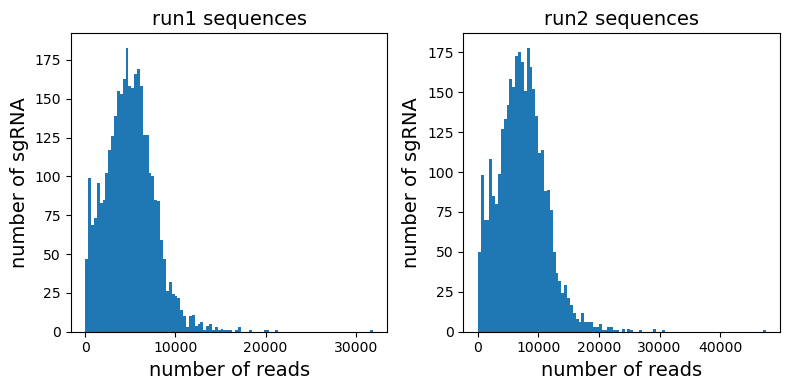

In [19]:
_d = df_all[df_all.experiment == 'NB14']
_d1 = _d[_d.fname == 'NB14_CKDL230009157-1A_H3TNFDSX7_L3_1_seqtk_sgRNAcounts_20230523.csv']
_d2 = _d[_d.fname == 'NB14_CKDL230009157-1A_H5HJGDSX7_L1_1_seqtk_sgRNAcounts_20230523.csv']

fig, ax = plt.subplots(1,2, figsize = (8,4))

ax[0].hist(_d1['counts'].values, bins = 100)
ax[0].set_title('run1 sequences', fontsize=14)
ax[1].hist(_d2['counts'].values, bins = 100)
ax[1].set_title('run2 sequences', fontsize=14)

for _ax in ax:
    _ax.set_xlabel('number of reads', fontsize=14)
    _ax.set_ylabel('number of sgRNA', fontsize=14)

plt.tight_layout()



In [21]:
_d1['counts'].values

array([2901, 3427, 2363, ..., 4085, 1899, 3720])

In [22]:
_d2['counts'].values

array([4400, 4846, 3605, ..., 5872, 2623, 5476])

In [23]:
_d.groupby('sgRNA')['counts'].sum().values

array([7301, 8273, 5968, ..., 9957, 4522, 9196])

Text(0.5, 1.0, 'run1 sequences')

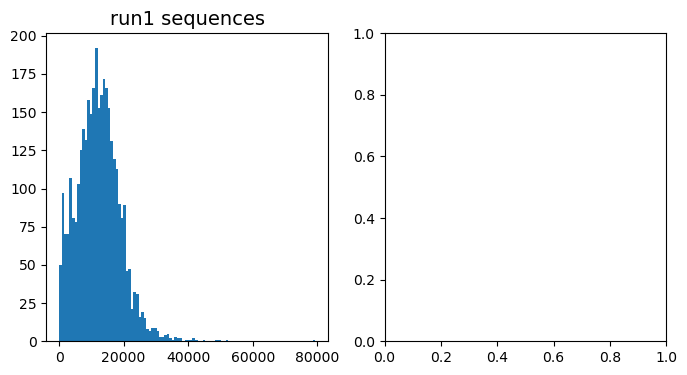

In [24]:
fig, ax = plt.subplots(1,2, figsize = (8,4))

ax[0].hist(_d.groupby('sgRNA')['counts'].sum().values, bins = 100)
ax[0].set_title('run1 sequences', fontsize=14)


In [25]:
df_all_= df_all.groupby(['sgRNA', 'gene', 'experiment'])['counts'].sum().reset_index()

In [26]:
df_all_

,sgRNA,gene,experiment,counts
0,AAAAAACAGGATCAACCTCA,CPA2,NB01,7263
1,AAAAAACAGGATCAACCTCA,CPA2,NB02,9093
2,AAAAAACAGGATCAACCTCA,CPA2,NB03,7144
3,AAAAAACAGGATCAACCTCA,CPA2,NB04,10242
4,AAAAAACAGGATCAACCTCA,CPA2,NB05,10305
...,...,...,...,...
172436,TTTTTCTCACCCGATGAATC,CONTROL,NB47,13473
172437,TTTTTCTCACCCGATGAATC,CONTROL,NB48,11023
172438,TTTTTCTCACCCGATGAATC,CONTROL,NB49,13721
172439,TTTTTCTCACCCGATGAATC,CONTROL,NB50,12875


In [135]:

# differentiation
#################################
# Calculate log2 fold change (with median normalization and 'prior' of log2(32))
#################################
# from first screen exps
df_temp = df_all_[df_all_.experiment =='NB06']
df_temp.columns = ['sgRNA', 'gene', 'experiment', 'counts_NB06']

df_temp2 = df_all_[df_all_.experiment =='NB01']
df_temp2.columns = ['sgRNA', 'gene', 'experiment', 'counts_NB01']

df_temp = df_temp.merge(df_temp2[['sgRNA', 'counts_NB01']], on = 'sgRNA')
df_temp

df_temp['NB06_NB01_diff'] = np.log2(df_temp['counts_NB06'] + 32) - np.log2(df_temp['counts_NB06'].median()) - (np.log2(df_temp['counts_NB01'] + 32) - np.log2(df_temp['counts_NB01'].median()))

df_temp = df_temp[['sgRNA', 'gene', 'NB06_NB01_diff']]
df_temp.columns = ['sgRNA', 'gene', 'diff']
# df_temp['diff'] = preprocessing.scale(df_temp['diff'])
df_temp['exp'] = 'differentiation_rep1'
df_compare = df_temp.copy()



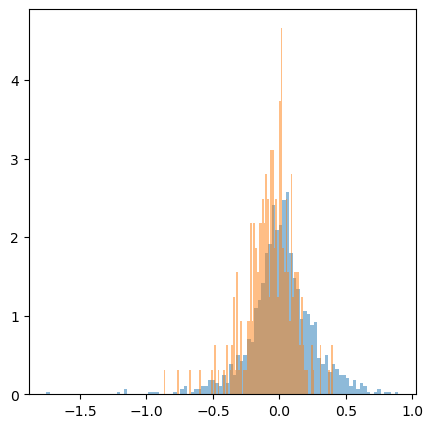

In [136]:
fig, ax = plt.subplots(1,1, figsize = (5,5))
df_compare_noControl = df_compare[df_compare.gene != 'CONTROL']
df_compare_controls = df_compare[df_compare.gene == 'CONTROL']

_ = ax.hist(df_compare_noControl.groupby('gene')['diff'].mean().values, 
        bins = 100, density = True, alpha = 0.5)
_ =ax.hist(df_compare_controls['diff'].values, 
        bins = 100, density = True, alpha = 0.5)

In [139]:
df_compare[df_compare.gene == 'FLCN']

# positive as expected (though perhaps not as dramatic?; I'll
# need to go back and double check I'm making the correct sample to sample comparison)

,sgRNA,gene,diff,exp
498,AGCCCGGGTTCAGGCTCTCA,FLCN,0.595198,differentiation_rep1
1449,CGAGTGAGTGTGGTCGCTCC,FLCN,0.307599,differentiation_rep1
2257,GCCCGGGTTCAGGCTCTCAG,FLCN,0.506174,differentiation_rep1


# NO E-field condition

In [ ]:
# reference group
# NB07

# NB08 - 1, top
# NB09 - 1, bottom
# NB10 - 2, top
# NB11 - 2, bottom
# NB12 - 3, top
# NB13 - 3, bottom
# NB14 - 4, top
# NB15 - 4, bottom
# NB16 - 5, top
# NB17 - 5, bottom
# NB18 - 6, top
# NB19 - 6, bottom
# NB20 - 7, top
# NB21 - 7, bottom
# NB22 - 8, top
# NB23 - 8, bottom



In [27]:
# from first screen exps
df_temp = df_all_[df_all_.experiment =='NB07']
df_temp.columns = ['sgRNA', 'gene', 'experiment', 'counts_NB07']

file = 'NB08'
df_temp2 = df_all_[df_all_.experiment == file]
df_temp2.columns = ['sgRNA', 'gene', 'experiment', 'counts_' + file]
df_temp = df_temp.merge(df_temp2[['sgRNA', 'counts_' + file]], on = 'sgRNA')

file = 'NB09'
df_temp2 = df_all_[df_all_.experiment == file]
df_temp2.columns = ['sgRNA', 'gene', 'experiment', 'counts_' + file]
df_temp = df_temp.merge(df_temp2[['sgRNA', 'counts_' + file]], on = 'sgRNA')

for file in ['NB10', 'NB11', 'NB12', 'NB13', 'NB14',
             'NB15', 'NB16', 'NB17', 'NB18', 'NB19',
             'NB20', 'NB21', 'NB22', 'NB23', 'NB24',
             'NB25', 'NB26', 'NB27', 'NB28', 'NB29',
             'NB30', 'NB31', 'NB32', 'NB33', 'NB34',
             'NB35', 'NB36', 'NB37', 'NB38', 'NB39',
             'NB41', 'NB42', 'NB43', 'NB44',
             'NB45', 'NB46', 'NB47', 'NB48', 'NB49']:
    df_temp2 = df_all_[df_all_.experiment == file]
    df_temp2.columns = ['sgRNA', 'gene', 'experiment', 'counts_' + file]
    df_temp = df_temp.merge(df_temp2[['sgRNA', 'counts_' + file]], on = 'sgRNA')




# df_temp

# df_temp['NB06_NB01_diff'] = np.log2(df_temp['counts_NB06'] + 32) - np.log2(df_temp['counts_NB06'].median()) - (np.log2(df_temp['counts_NB01'] + 32) - np.log2(df_temp['counts_NB01'].median()))

# df_temp = df_temp[['sgRNA', 'gene', 'NB06_NB01_diff']]
# df_temp.columns = ['sgRNA', 'gene', 'diff']
# # df_temp['diff'] = preprocessing.scale(df_temp['diff'])
# df_temp['exp'] = 'differentiation_rep1'
# df_compare = df_temp.copy()


In [29]:
#### Replicate 1

# top
df_temp['NB08_NB07_diff'] = np.log2(df_temp['counts_NB08'] + 32) - np.log2(df_temp['counts_NB08'].median()) - (np.log2(df_temp['counts_NB07'] + 32) - np.log2(df_temp['counts_NB07'].median()))
# bottom
df_temp['NB09_NB07_diff'] = np.log2(df_temp['counts_NB09'] + 32) - np.log2(df_temp['counts_NB09'].median()) - (np.log2(df_temp['counts_NB07'] + 32) - np.log2(df_temp['counts_NB07'].median()))

df_temp_ = df_temp[['sgRNA', 'gene', 'NB08_NB07_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(-df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'top_0_1'
df_compare = df_temp_.copy()

df_temp_ = df_temp[['sgRNA', 'gene', 'NB09_NB07_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'bottom_0_1'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)


#### Replicate 2

# top
df_temp['NB10_NB07_diff'] = np.log2(df_temp['counts_NB10'] + 32) - np.log2(df_temp['counts_NB10'].median()) - (np.log2(df_temp['counts_NB07'] + 32) - np.log2(df_temp['counts_NB07'].median()))
# bottom
df_temp['NB11_NB07_diff'] = np.log2(df_temp['counts_NB11'] + 32) - np.log2(df_temp['counts_NB11'].median()) - (np.log2(df_temp['counts_NB07'] + 32) - np.log2(df_temp['counts_NB07'].median()))

df_temp_ = df_temp[['sgRNA', 'gene', 'NB10_NB07_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(-df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'top_0_2'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

df_temp_ = df_temp[['sgRNA', 'gene', 'NB11_NB07_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'bottom_0_2'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

#### Replicate 3

# top
df_temp['NB12_NB07_diff'] = np.log2(df_temp['counts_NB12'] + 32) - np.log2(df_temp['counts_NB12'].median()) - (np.log2(df_temp['counts_NB07'] + 32) - np.log2(df_temp['counts_NB07'].median()))
# bottom
df_temp['NB13_NB07_diff'] = np.log2(df_temp['counts_NB13'] + 32) - np.log2(df_temp['counts_NB13'].median()) - (np.log2(df_temp['counts_NB07'] + 32) - np.log2(df_temp['counts_NB07'].median()))

df_temp_ = df_temp[['sgRNA', 'gene', 'NB12_NB07_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(-df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'top_0_3'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

df_temp_ = df_temp[['sgRNA', 'gene', 'NB13_NB07_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'bottom_0_3'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

#### Replicate 4

# top
df_temp['NB14_NB07_diff'] = np.log2(df_temp['counts_NB14'] + 32) - np.log2(df_temp['counts_NB14'].median()) - (np.log2(df_temp['counts_NB07'] + 32) - np.log2(df_temp['counts_NB07'].median()))
# bottom
df_temp['NB15_NB07_diff'] = np.log2(df_temp['counts_NB15'] + 32) - np.log2(df_temp['counts_NB15'].median()) - (np.log2(df_temp['counts_NB07'] + 32) - np.log2(df_temp['counts_NB07'].median()))

df_temp_ = df_temp[['sgRNA', 'gene', 'NB14_NB07_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(-df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'top_0_4'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

df_temp_ = df_temp[['sgRNA', 'gene', 'NB15_NB07_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'bottom_0_4'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

#### Replicate 5

# top
df_temp['NB16_NB07_diff'] = np.log2(df_temp['counts_NB16'] + 32) - np.log2(df_temp['counts_NB16'].median()) - (np.log2(df_temp['counts_NB07'] + 32) - np.log2(df_temp['counts_NB07'].median()))
# bottom
df_temp['NB17_NB07_diff'] = np.log2(df_temp['counts_NB17'] + 32) - np.log2(df_temp['counts_NB17'].median()) - (np.log2(df_temp['counts_NB07'] + 32) - np.log2(df_temp['counts_NB07'].median()))

df_temp_ = df_temp[['sgRNA', 'gene', 'NB16_NB07_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(-df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'top_0_5'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

df_temp_ = df_temp[['sgRNA', 'gene', 'NB17_NB07_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'bottom_0_5'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)


#### Replicate 6

# top
df_temp['NB18_NB07_diff'] = np.log2(df_temp['counts_NB18'] + 32) - np.log2(df_temp['counts_NB18'].median()) - (np.log2(df_temp['counts_NB07'] + 32) - np.log2(df_temp['counts_NB07'].median()))
# bottom
df_temp['NB19_NB07_diff'] = np.log2(df_temp['counts_NB19'] + 32) - np.log2(df_temp['counts_NB19'].median()) - (np.log2(df_temp['counts_NB07'] + 32) - np.log2(df_temp['counts_NB07'].median()))

df_temp_ = df_temp[['sgRNA', 'gene', 'NB18_NB07_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(-df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'top_0_6'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

df_temp_ = df_temp[['sgRNA', 'gene', 'NB19_NB07_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'bottom_0_6'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

#### Replicate 7

# top
df_temp['NB20_NB07_diff'] = np.log2(df_temp['counts_NB20'] + 32) - np.log2(df_temp['counts_NB20'].median()) - (np.log2(df_temp['counts_NB07'] + 32) - np.log2(df_temp['counts_NB07'].median()))
# bottom
df_temp['NB21_NB07_diff'] = np.log2(df_temp['counts_NB21'] + 32) - np.log2(df_temp['counts_NB21'].median()) - (np.log2(df_temp['counts_NB07'] + 32) - np.log2(df_temp['counts_NB07'].median()))

df_temp_ = df_temp[['sgRNA', 'gene', 'NB20_NB07_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(-df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'top_0_7'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

df_temp_ = df_temp[['sgRNA', 'gene', 'NB21_NB07_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'bottom_0_7'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

#### Replicate 8

# top
df_temp['NB22_NB07_diff'] = np.log2(df_temp['counts_NB22'] + 32) - np.log2(df_temp['counts_NB22'].median()) - (np.log2(df_temp['counts_NB07'] + 32) - np.log2(df_temp['counts_NB07'].median()))
# bottom
df_temp['NB23_NB07_diff'] = np.log2(df_temp['counts_NB23'] + 32) - np.log2(df_temp['counts_NB23'].median()) - (np.log2(df_temp['counts_NB07'] + 32) - np.log2(df_temp['counts_NB07'].median()))

df_temp_ = df_temp[['sgRNA', 'gene', 'NB22_NB07_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(-df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'top_0_8'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

df_temp_ = df_temp[['sgRNA', 'gene', 'NB23_NB07_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'bottom_0_8'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/854681121.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_['diff'] = preprocessing.scale(-df_temp_['diff'])
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/854681121.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_['diff'] = scale_new_data
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/854681121.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [30]:
df_compare

,sgRNA,gene,diff,exp
0,AAAAAACAGGATCAACCTCA,CPA2,-0.443819,top_0_1
1,AAAAACTTACCAACCAGAAA,WFDC11,-1.399012,top_0_1
2,AAAAAGCCAGGGCCGCACGC,CELSR3,1.054092,top_0_1
3,AAAACATCGACCGAAAGCGT,CONTROL,-0.698973,top_0_1
4,AAAACATGATTCAATGGAGT,OR4D11,2.043438,top_0_1
...,...,...,...,...
55147,TTTGACTGTGAGAGACCCAG,CSTF2,-0.828948,bottom_0_8
55148,TTTGTCTGGGCGAACTCCGG,SLC38A11,-0.667814,bottom_0_8
55149,TTTGTGTCTCAGGAACCATG,MYCT1,1.075323,bottom_0_8
55150,TTTTTAATACAAGGTAATCT,CONTROL,0.457580,bottom_0_8


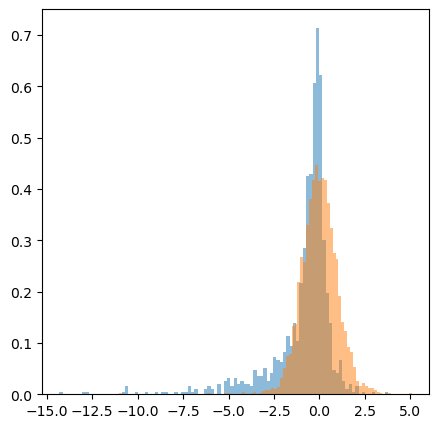

In [31]:
fig, ax = plt.subplots(1,1, figsize = (5,5))
df_compare_noControl = df_compare[df_compare.gene != 'CONTROL']
df_compare_controls = df_compare[df_compare.gene == 'CONTROL']

_ = ax.hist(df_compare_noControl.groupby('gene')['diff'].mean().values, 
        bins = 100, density = True, alpha = 0.5)
_ =ax.hist(df_compare_controls['diff'].values, 
        bins = 100, density = True, alpha = 0.5)

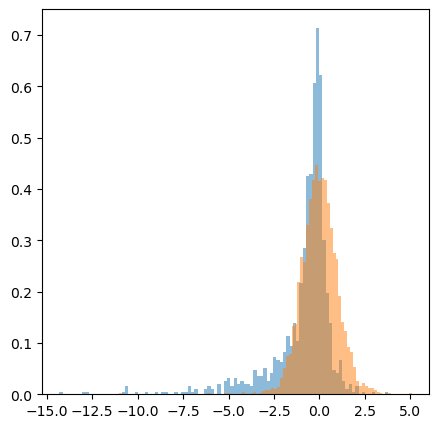

In [32]:
fig, ax = plt.subplots(1,1, figsize = (5,5))
df_compare_noControl = df_compare[df_compare.gene != 'CONTROL']
df_compare_controls = df_compare[df_compare.gene == 'CONTROL']

_ = ax.hist(df_compare_noControl.groupby('gene')['diff'].mean().values, 
        bins = 100, density = True, alpha = 0.5)
_ =ax.hist(df_compare_controls['diff'].values, 
        bins = 100, density = True, alpha = 0.5)

Looks really good! REally dramatic log2 fold-changes compared to my genome-wide screens. At least the top few genes were expected (e.g. FERMT3); haven't looked closely otherwise.

In [33]:
# look at individual 'top' and 'bottom' batches

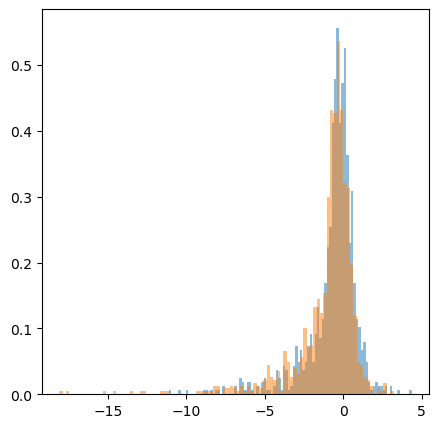

In [34]:
fig, ax = plt.subplots(1,1, figsize = (5,5))
df_compare_noControl = df_compare[df_compare.gene != 'CONTROL']
df_compare_noControl1 = df_compare_noControl[df_compare_noControl.exp.str.contains('top')]
df_compare_noControl2 = df_compare_noControl[df_compare_noControl.exp.str.contains('bottom')]

_ = ax.hist(df_compare_noControl1.groupby('gene')['diff'].mean().values, 
        bins = 100, density = True, alpha = 0.5)
_ = ax.hist(df_compare_noControl2.groupby('gene')['diff'].mean().values, 
        bins = 100, density = True, alpha = 0.5)

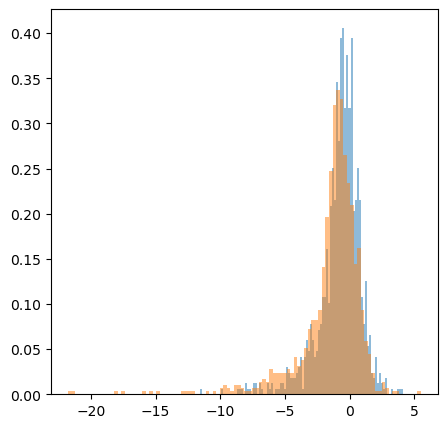

In [35]:
fig, ax = plt.subplots(1,1, figsize = (5,5))
df_compare_noControl = df_compare[df_compare.gene != 'CONTROL']
df_compare_noControl1 = df_compare_noControl[df_compare_noControl.exp == 'top_0_1']
df_compare_noControl2 = df_compare_noControl[df_compare_noControl.exp == 'bottom_0_1']

_ = ax.hist(df_compare_noControl1.groupby('gene')['diff'].mean().values, 
        bins = 100, density = True, alpha = 0.5)
_ = ax.hist(df_compare_noControl2.groupby('gene')['diff'].mean().values, 
        bins = 100, density = True, alpha = 0.5)

# + E field condition

In [38]:
df_compare

,sgRNA,gene,diff,exp
0,AAAAAACAGGATCAACCTCA,CPA2,-0.443819,top_0_1
1,AAAAACTTACCAACCAGAAA,WFDC11,-1.399012,top_0_1
2,AAAAAGCCAGGGCCGCACGC,CELSR3,1.054092,top_0_1
3,AAAACATCGACCGAAAGCGT,CONTROL,-0.698973,top_0_1
4,AAAACATGATTCAATGGAGT,OR4D11,2.043438,top_0_1
...,...,...,...,...
55147,TTTGACTGTGAGAGACCCAG,CSTF2,-0.828948,bottom_0_8
55148,TTTGTCTGGGCGAACTCCGG,SLC38A11,-0.667814,bottom_0_8
55149,TTTGTGTCTCAGGAACCATG,MYCT1,1.075323,bottom_0_8
55150,TTTTTAATACAAGGTAATCT,CONTROL,0.457580,bottom_0_8


In [39]:
#### Replicate 1

# top
df_temp['NB25_NB24_diff'] = np.log2(df_temp['counts_NB25'] + 32) - np.log2(df_temp['counts_NB25'].median()) - (np.log2(df_temp['counts_NB24'] + 32) - np.log2(df_temp['counts_NB24'].median()))
# bottom
df_temp['NB26_NB24_diff'] = np.log2(df_temp['counts_NB26'] + 32) - np.log2(df_temp['counts_NB26'].median()) - (np.log2(df_temp['counts_NB24'] + 32) - np.log2(df_temp['counts_NB24'].median()))

df_temp_ = df_temp[['sgRNA', 'gene', 'NB25_NB24_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(-df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'top_Efield_1'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

df_temp_ = df_temp[['sgRNA', 'gene', 'NB26_NB24_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'bottom_Efield_1'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

#### Replicate 2

# top
df_temp['NB28_NB27_diff'] = np.log2(df_temp['counts_NB28'] + 32) - np.log2(df_temp['counts_NB28'].median()) - (np.log2(df_temp['counts_NB27'] + 32) - np.log2(df_temp['counts_NB27'].median()))
# bottom
df_temp['NB29_NB27_diff'] = np.log2(df_temp['counts_NB29'] + 32) - np.log2(df_temp['counts_NB29'].median()) - (np.log2(df_temp['counts_NB27'] + 32) - np.log2(df_temp['counts_NB27'].median()))

df_temp_ = df_temp[['sgRNA', 'gene', 'NB28_NB27_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(-df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'top_Efield_2'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

df_temp_ = df_temp[['sgRNA', 'gene', 'NB29_NB27_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'bottom_Efield_2'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)


#### Replicate 3

# top
df_temp['NB31_NB30_diff'] = np.log2(df_temp['counts_NB31'] + 32) - np.log2(df_temp['counts_NB31'].median()) - (np.log2(df_temp['counts_NB30'] + 32) - np.log2(df_temp['counts_NB30'].median()))
# bottom
df_temp['NB32_NB30_diff'] = np.log2(df_temp['counts_NB32'] + 32) - np.log2(df_temp['counts_NB32'].median()) - (np.log2(df_temp['counts_NB30'] + 32) - np.log2(df_temp['counts_NB30'].median()))

df_temp_ = df_temp[['sgRNA', 'gene', 'NB31_NB30_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(-df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'top_Efield_3'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

df_temp_ = df_temp[['sgRNA', 'gene', 'NB32_NB30_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'bottom_Efield_3'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

#### Replicate 4

# top
df_temp['NB33_NB30_diff'] = np.log2(df_temp['counts_NB33'] + 32) - np.log2(df_temp['counts_NB33'].median()) - (np.log2(df_temp['counts_NB30'] + 32) - np.log2(df_temp['counts_NB30'].median()))
# bottom
df_temp['NB34_NB30_diff'] = np.log2(df_temp['counts_NB34'] + 32) - np.log2(df_temp['counts_NB34'].median()) - (np.log2(df_temp['counts_NB30'] + 32) - np.log2(df_temp['counts_NB30'].median()))

df_temp_ = df_temp[['sgRNA', 'gene', 'NB33_NB30_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(-df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'top_Efield_4'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

df_temp_ = df_temp[['sgRNA', 'gene', 'NB34_NB30_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'bottom_Efield_4'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)


#### Replicate 5

# top
df_temp['NB36_NB35_diff'] = np.log2(df_temp['counts_NB36'] + 32) - np.log2(df_temp['counts_NB36'].median()) - (np.log2(df_temp['counts_NB35'] + 32) - np.log2(df_temp['counts_NB35'].median()))
# bottom
df_temp['NB37_NB35_diff'] = np.log2(df_temp['counts_NB37'] + 32) - np.log2(df_temp['counts_NB37'].median()) - (np.log2(df_temp['counts_NB35'] + 32) - np.log2(df_temp['counts_NB35'].median()))

df_temp_ = df_temp[['sgRNA', 'gene', 'NB36_NB35_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(-df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'top_Efield_5'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

df_temp_ = df_temp[['sgRNA', 'gene', 'NB37_NB35_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'bottom_Efield_5'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)


#### Replicate 6

# top
df_temp['NB38_NB35_diff'] = np.log2(df_temp['counts_NB38'] + 32) - np.log2(df_temp['counts_NB38'].median()) - (np.log2(df_temp['counts_NB35'] + 32) - np.log2(df_temp['counts_NB35'].median()))
# bottom
df_temp['NB39_NB35_diff'] = np.log2(df_temp['counts_NB39'] + 32) - np.log2(df_temp['counts_NB39'].median()) - (np.log2(df_temp['counts_NB35'] + 32) - np.log2(df_temp['counts_NB35'].median()))

df_temp_ = df_temp[['sgRNA', 'gene', 'NB38_NB35_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(-df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'top_Efield_6'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

df_temp_ = df_temp[['sgRNA', 'gene', 'NB39_NB35_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'bottom_Efield_6'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

#### Replicate 7

# top
df_temp['NB41_NB35_diff'] = np.log2(df_temp['counts_NB41'] + 32) - np.log2(df_temp['counts_NB41'].median()) - (np.log2(df_temp['counts_NB35'] + 32) - np.log2(df_temp['counts_NB35'].median()))
# bottom
df_temp['NB42_NB35_diff'] = np.log2(df_temp['counts_NB42'] + 32) - np.log2(df_temp['counts_NB42'].median()) - (np.log2(df_temp['counts_NB35'] + 32) - np.log2(df_temp['counts_NB35'].median()))

df_temp_ = df_temp[['sgRNA', 'gene', 'NB41_NB35_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(-df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'top_Efield_7'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

df_temp_ = df_temp[['sgRNA', 'gene', 'NB42_NB35_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'bottom_Efield_7'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)


#### Replicate 8

# top
df_temp['NB44_NB43_diff'] = np.log2(df_temp['counts_NB44'] + 32) - np.log2(df_temp['counts_NB44'].median()) - (np.log2(df_temp['counts_NB43'] + 32) - np.log2(df_temp['counts_NB43'].median()))
# bottom
df_temp['NB45_NB43_diff'] = np.log2(df_temp['counts_NB45'] + 32) - np.log2(df_temp['counts_NB45'].median()) - (np.log2(df_temp['counts_NB43'] + 32) - np.log2(df_temp['counts_NB43'].median()))

df_temp_ = df_temp[['sgRNA', 'gene', 'NB44_NB43_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(-df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'top_Efield_8'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

df_temp_ = df_temp[['sgRNA', 'gene', 'NB45_NB43_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'bottom_Efield_8'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

#### Replicate 9

# top
df_temp['NB46_NB43_diff'] = np.log2(df_temp['counts_NB46'] + 32) - np.log2(df_temp['counts_NB46'].median()) - (np.log2(df_temp['counts_NB43'] + 32) - np.log2(df_temp['counts_NB43'].median()))
# bottom
df_temp['NB47_NB43_diff'] = np.log2(df_temp['counts_NB47'] + 32) - np.log2(df_temp['counts_NB47'].median()) - (np.log2(df_temp['counts_NB43'] + 32) - np.log2(df_temp['counts_NB43'].median()))

df_temp_ = df_temp[['sgRNA', 'gene', 'NB46_NB43_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(-df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'top_Efield_9'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_))

df_temp_ = df_temp[['sgRNA', 'gene', 'NB47_NB43_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'bottom_Efield_9'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)


#### Replicate 10

# top
df_temp['NB48_NB43_diff'] = np.log2(df_temp['counts_NB48'] + 32) - np.log2(df_temp['counts_NB48'].median()) - (np.log2(df_temp['counts_NB43'] + 32) - np.log2(df_temp['counts_NB43'].median()))
# bottom
df_temp['NB49_NB43_diff'] = np.log2(df_temp['counts_NB49'] + 32) - np.log2(df_temp['counts_NB49'].median()) - (np.log2(df_temp['counts_NB43'] + 32) - np.log2(df_temp['counts_NB43'].median()))

df_temp_ = df_temp[['sgRNA', 'gene', 'NB48_NB43_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(-df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'top_Efield_10'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

df_temp_ = df_temp[['sgRNA', 'gene', 'NB49_NB43_diff']]
df_temp_.columns = ['sgRNA', 'gene', 'diff']
df_temp_['diff'] = preprocessing.scale(df_temp_['diff'])
s = preprocessing.StandardScaler()
s.fit(np.array([df_temp_[df_temp_.gene == 'CONTROL']['diff'].values]).T)
scale_new_data = scale_data(df_temp_['diff'], means = s.mean_, stds = s.scale_)
df_temp_['diff'] = scale_new_data
df_temp_['exp'] = 'bottom_Efield_10'
df_compare = pd.concat([df_compare, df_temp_], ignore_index=True)
# df_compare = df_compare.append(df_temp_)

/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/3049904091.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_['diff'] = preprocessing.scale(-df_temp_['diff'])
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/3049904091.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_['diff'] = scale_new_data
/var/folders/qv/q8mx1lzj3q30hd675zpl_fpr0000gq/T/ipykernel_60845/3049904091.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [40]:
df_compare

,sgRNA,gene,diff,exp
0,AAAAAACAGGATCAACCTCA,CPA2,-0.443819,top_0_1
1,AAAAACTTACCAACCAGAAA,WFDC11,-1.399012,top_0_1
2,AAAAAGCCAGGGCCGCACGC,CELSR3,1.054092,top_0_1
3,AAAACATCGACCGAAAGCGT,CONTROL,-0.698973,top_0_1
4,AAAACATGATTCAATGGAGT,OR4D11,2.043438,top_0_1
...,...,...,...,...
124087,TTTGACTGTGAGAGACCCAG,CSTF2,-1.670675,bottom_Efield_10
124088,TTTGTCTGGGCGAACTCCGG,SLC38A11,-1.955754,bottom_Efield_10
124089,TTTGTGTCTCAGGAACCATG,MYCT1,-0.573124,bottom_Efield_10
124090,TTTTTAATACAAGGTAATCT,CONTROL,0.479676,bottom_Efield_10


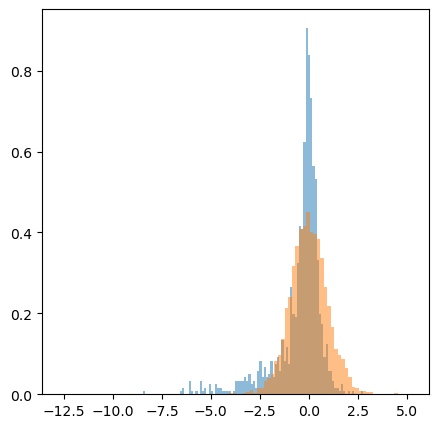

In [41]:
fig, ax = plt.subplots(1,1, figsize = (5,5))
df_compare_noControl = df_compare[df_compare.gene != 'CONTROL']
df_compare_noControl = df_compare_noControl[df_compare_noControl.exp.str.contains('Efield')]

df_compare_controls = df_compare[df_compare.gene == 'CONTROL']
df_compare_controls = df_compare_controls[df_compare_controls.exp.str.contains('Efield')]

_ = ax.hist(df_compare_noControl.groupby('gene')['diff'].mean().values, 
        bins = 100, density = True, alpha = 0.5)
_ =ax.hist(df_compare_controls['diff'].values, 
        bins = 100, density = True, alpha = 0.5)

In [42]:
df_compare_noControl.sort_values('diff')[:60]

,sgRNA,gene,diff,exp
57975,GGTCCCGGCCTTGCGGCCTG,PORCN,-26.012960,top_Efield_1
59790,CCCGACCGCCGCCACTACCG,PLAGL2,-19.927710,bottom_Efield_1
82104,GGTCCCGGCCTTGCGGCCTG,PORCN,-18.332314,bottom_Efield_4
102555,GGAGGTGAGGCGGAACTCTG,CAP1,-17.653360,bottom_Efield_7
59840,CCGAGCGCGCCCAGGGAGGG,GNA13,-17.429832,bottom_Efield_1
101830,CTGGGTTCAGGGCGAGCGGG,ATIC,-17.391331,bottom_Efield_7
101154,CCCGACCGCCGCCACTACCG,PLAGL2,-17.385943,bottom_Efield_7
61191,GGAGGTGAGGCGGAACTCTG,CAP1,-17.306619,bottom_Efield_1
66078,AGGAAGCCCACGGCCCACAG,FERMT3,-17.099423,bottom_Efield_2
59553,CAGCAGCCGAGGCCACCAAG,INPP5D,-16.493698,bottom_Efield_1


In [44]:
# df_compare[df_compare.gene == 'ABHD17A'].sort_values('diff')

In [46]:
df_compare[df_compare.gene == 'TMSB4X'].sort_values('diff')

,sgRNA,gene,diff,exp
74070,CGTACTCGTGCGCCTCGCTT,TMSB4X,-2.566425,bottom_Efield_3
59973,CCTCGCTTCGGTGAGCCCCA,TMSB4X,-2.317964,bottom_Efield_1
11715,CCTCGCTTCGGTGAGCCCCA,TMSB4X,-2.070628,bottom_0_2
122328,CGTACTCGTGCGCCTCGCTT,TMSB4X,-2.050310,bottom_Efield_10
28950,CCTCGCTTCGGTGAGCCCCA,TMSB4X,-2.042559,top_0_5
...,...,...,...,...
108231,CCTCGCTTCGGTGAGCCCCA,TMSB4X,0.344149,bottom_Efield_8
93655,AGGAAGGAGGCAGGGGCCCT,TMSB4X,0.385135,bottom_Efield_6
86761,AGGAAGGAGGCAGGGGCCCT,TMSB4X,0.416246,bottom_Efield_5
70623,CGTACTCGTGCGCCTCGCTT,TMSB4X,0.640274,top_Efield_3


In [184]:
df_compare_noControl[df_compare_noControl.gene == 'UXS1'].groupby('sgRNA').mean()

,diff
sgRNA,
CACCATCCCCGGGAGCCGCG,-3.582895
GGGTCCAGGGCCCTACCGCG,0.028950
GGTAGGGCCCTGGACCCGCG,-5.460057


In [202]:
df_compare_noControl[df_compare_noControl.gene == 'TM2D2'].groupby('sgRNA').mean()

,diff
sgRNA,
CATCTTCCCGGGCACAGGAG,-3.401454
CCCGGGAAGATGGTGCTAGG,-3.755329
GTGCCCGGGAAGATGGTGCT,-2.632742


In [201]:
df_compare_noControl[df_compare_noControl.gene == 'TMSB4X'].groupby('sgRNA').mean()

,diff
sgRNA,
AGGAAGGAGGCAGGGGCCCT,-0.437091
CCTCGCTTCGGTGAGCCCCA,-0.628306
CGTACTCGTGCGCCTCGCTT,-0.760337


In [187]:
df_compare_noControl.groupby('gene')['diff'].mean().sort_values()[:60]

gene
VPS29      -7.420605
FERMT3     -5.896475
CAP1       -5.787353
ETV5       -5.681795
PLAGL2     -5.480330
ARHGAP30   -5.394381
CBFB       -5.329862
PSMD4      -5.312133
ATIC       -5.302066
SS18       -5.126752
TLN1       -4.983791
TMEM154    -4.946666
B3GNT2     -4.800270
DOCK2      -4.788034
PDCL       -4.775843
GNPNAT1    -4.644023
MOB4       -4.620486
RHOA       -4.570450
CAPZB      -4.398141
VPS35      -4.398032
LAMTOR2    -4.350959
ELOF1      -4.210336
GFPT1      -4.101169
TRAF3IP3   -4.073483
TAF4       -4.054529
PGM3       -4.035292
VPS13B     -3.954009
FH         -3.952802
SZRD1      -3.951066
GMDS       -3.778025
GSS        -3.666618
YIPF5      -3.608352
RAP1A      -3.442286
VBP1       -3.405094
SIN3B      -3.347131
TM2D2      -3.263175
YTHDC1     -3.236602
STK4       -3.224774
CCNC       -3.175038
PIKFYVE    -3.131528
RBM25      -3.078809
WDR48      -3.076665
INPP5D     -3.061848
GNAI2      -3.041160
UXS1       -3.004668
NAA30      -2.996312
LUC7L3     -2.989528
PPP2R1A 

In [48]:
df_compare.to_csv('../../data/screen_summary/log2foldchange/20230918_galvo_sublib_screen_updated.csv')

Overall it looks like the experiments worked. I'll need to sift through the experiments more carefully, but what is quite exciting is the presence of UXS1 and TM2D2 again. I believe TM2D2 only showed up for 1 sgRNA last time, so since this is based on average across three, it may be that new sgRNA's were included and they worked better. Will need to look at more closely. 